<a href="https://colab.research.google.com/github/keinerfan/CIAP_ANN/blob/main/checking_morgan_pca_ml_alghorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib.pyplot import plot, xlabel, ylabel, show
import matplotlib.pyplot as plt  # Importing plt for show() function
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv("CIAP1_and_CIAP2_06_morgan_fp.csv")
data.fillna(data.mean(), inplace=True)

y = data.pIC50.values.reshape((-1,1))
data = data.drop(['pIC50'] , axis = 1 )
pca = PCA(n_components=75)
pca.fit(data)
merged_data = pca.transform(data)

# SVR **bold text**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


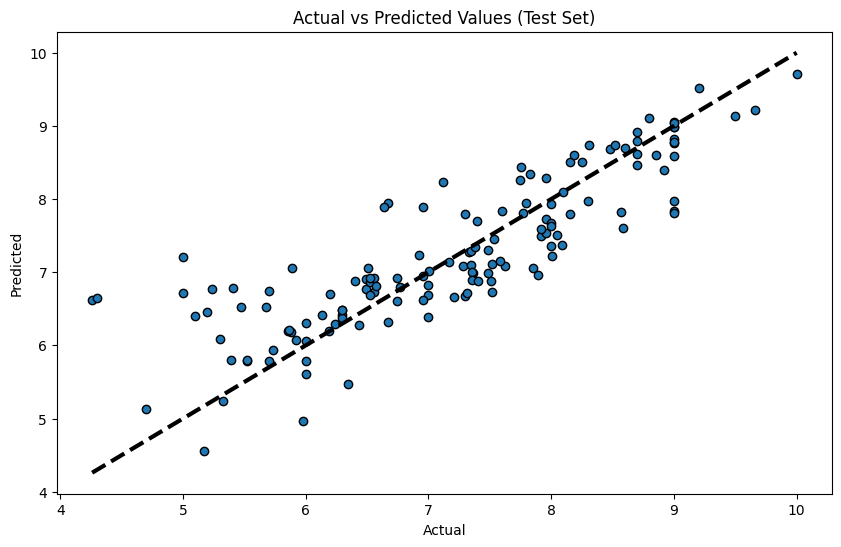

Training Set Metrics:
R-Squared: 0.8580122648595946
Adjusted R-Squared: 0.8362794482564713
Mean Squared Error (MSE): 0.24693820213132534
Mean Absolute Error (MAE): 0.321931749614787
Mean Absolute Percentage Error (MAPE): 20.993405681628374

Testing Set Metrics:
R-Squared: 0.7233154494175588
Adjusted R-Squared: 0.4089011873920574
Mean Squared Error (MSE): 0.42006240476110646
Mean Absolute Error (MAE): 0.4714297656922332
Mean Absolute Percentage Error (MAPE): 19.031135964371757


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming merged_data and merged_y are your datasets
# Replace the following lines with your actual data loading process
# merged_data = pd.read_csv('path_to_merged_data.csv')
# merged_y = pd.read_csv('path_to_merged_y.csv')

# Sample data for demonstration purposes
# merged_data = pd.DataFrame({'feature1': range(100), 'feature2': range(100, 200)})
# merged_y = pd.Series(range(100))

# Ensure your features and target are in appropriate formats
X = merged_data


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = SVR(kernel='poly' , C=1.0, epsilon=0.2)
model.fit(X_train, y_train)

# Make predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


# **desciison_tree regressor**

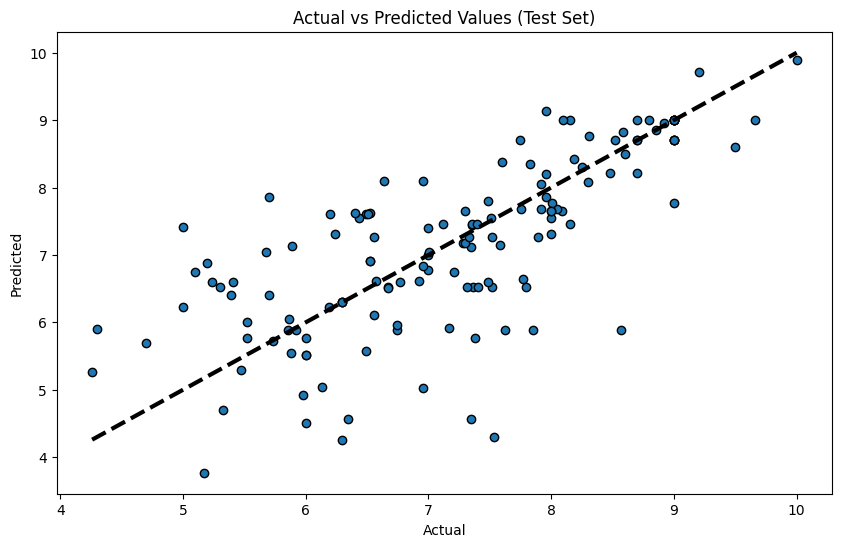

Training Set Metrics:
R-Squared: 0.9929778289327713
Adjusted R-Squared: 0.9919030068306445
Mean Squared Error (MSE): 0.012212620313193562
Mean Absolute Error (MAE): 0.027930965211303786
Mean Absolute Percentage Error (MAPE): 22.524640186912237

Testing Set Metrics:
R-Squared: 0.4318887716840095
Adjusted R-Squared: -0.21369216958416137
Mean Squared Error (MSE): 0.8625063027040784
Mean Absolute Error (MAE): 0.6640238458861001
Mean Absolute Percentage Error (MAPE): 20.882497261128147


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

X = merged_data


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


elastic net regressor
# ***New Section***

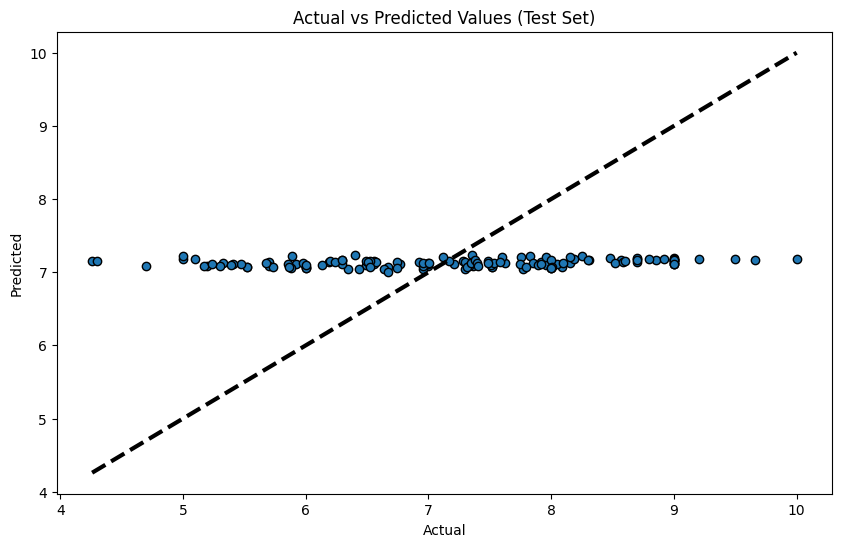

Training Set Metrics:
R-Squared: 0.031450729637999775
Adjusted R-Squared: -0.1167966076623066
Mean Squared Error (MSE): 1.6844540499381357
Mean Absolute Error (MAE): 1.082102231644665
Mean Absolute Percentage Error (MAPE): 16.826047815346506

Testing Set Metrics:
R-Squared: 0.018602985895506907
Adjusted R-Squared: -1.0966208937686899
Mean Squared Error (MSE): 1.4899566632914294
Mean Absolute Error (MAE): 1.0190920706675064
Mean Absolute Percentage Error (MAPE): 15.106349793263249


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


X = merged_data


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = ElasticNet(random_state=42)
model.fit(X_train, y_train)

# Make predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


# KNN **regressor**

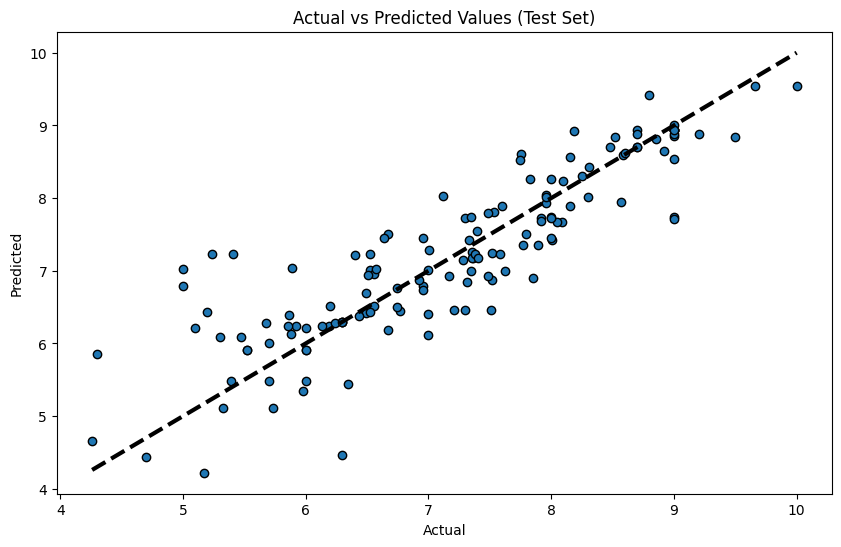

Training Set Metrics:
R-Squared: 0.8506506709281872
Adjusted R-Squared: 0.8277910797437261
Mean Squared Error (MSE): 0.25974113027469636
Mean Absolute Error (MAE): 0.3391098025726351
Mean Absolute Percentage Error (MAPE): 5.1943488727348965

Testing Set Metrics:
R-Squared: 0.760877776724619
Adjusted R-Squared: 0.4891479775480496
Mean Squared Error (MSE): 0.36303529029514675
Mean Absolute Error (MAE): 0.4304592561834006
Mean Absolute Percentage Error (MAPE): 6.6100313222399025


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

X = merged_data


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = KNeighborsRegressor()
model.fit(X_train, y_train)

# Make predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


# **extra tree **regressor** **bold text**

<ipython-input-18-6b948695c51b>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


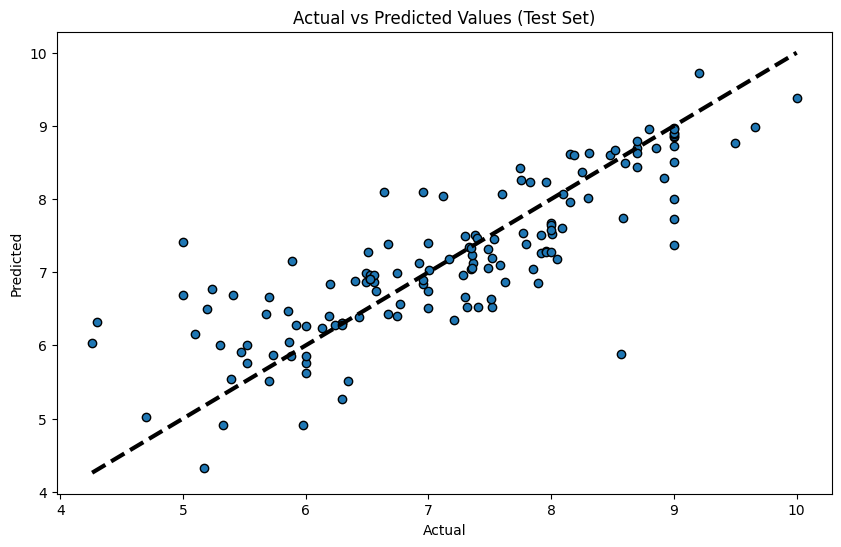

Training Set Metrics:
R-Squared: 0.9929778289327713
Adjusted R-Squared: 0.9919030068306445
Mean Squared Error (MSE): 0.012212620313193562
Mean Absolute Error (MAE): 0.027930965211311425
Mean Absolute Percentage Error (MAPE): 22.524640186912244

Testing Set Metrics:
R-Squared: 0.6823287819893235
Adjusted R-Squared: 0.3213387615226455
Mean Squared Error (MSE): 0.4822883514097548
Mean Absolute Error (MAE): 0.5066179504491964
Mean Absolute Percentage Error (MAPE): 19.058034554343877


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


X = merged_data


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = ExtraTreesRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


# **XGBoost**

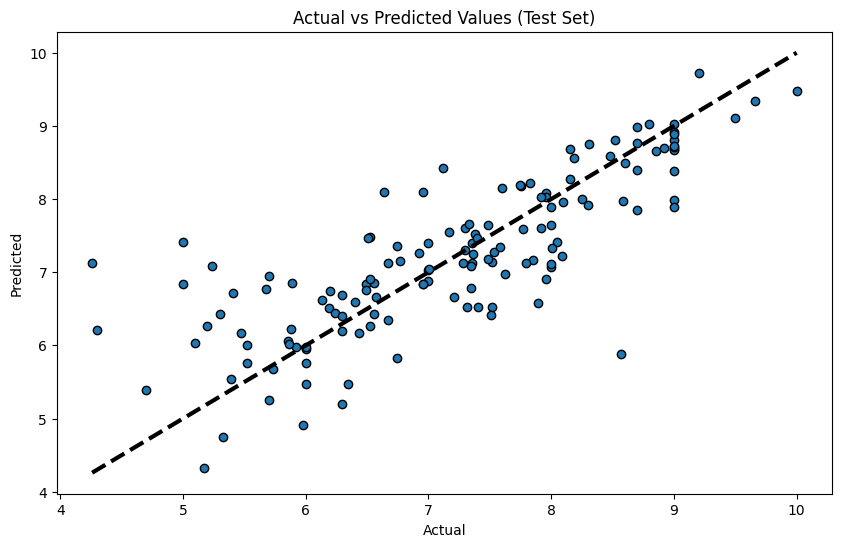

Training Set Metrics:
R-Squared: 0.9929776442967154
Adjusted R-Squared: 0.9919027939339677
Mean Squared Error (MSE): 0.012212941423292612
Mean Absolute Error (MAE): 0.028328573936789503
Mean Absolute Percentage Error (MAPE): 22.523936103878825

Testing Set Metrics:
R-Squared: 0.6435999868194331
Adjusted R-Squared: 0.23859997184151616
Mean Squared Error (MSE): 0.5410863970480749
Mean Absolute Error (MAE): 0.5310329301822386
Mean Absolute Percentage Error (MAPE): 19.309196912402243


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


X = merged_data


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Make predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()



# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


# **random forest**

<ipython-input-16-df5947c53284>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


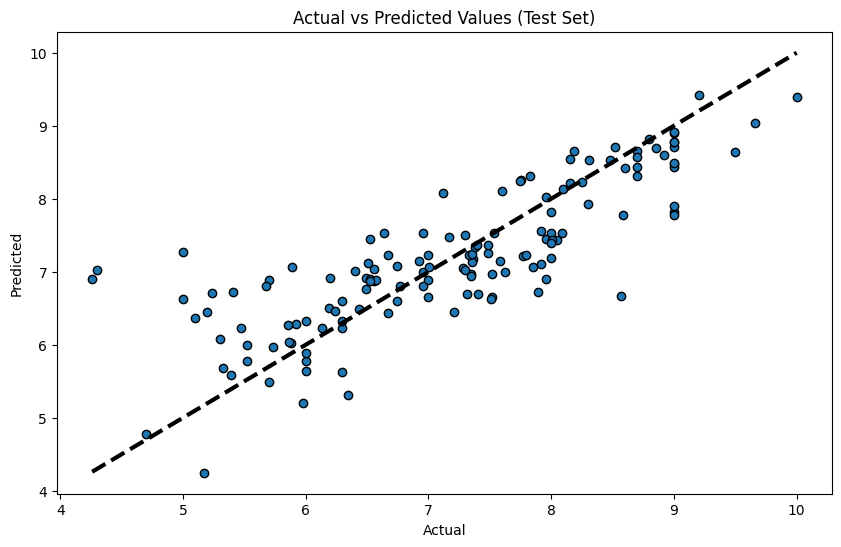

Training Set Metrics:
R-Squared: 0.9595962798982942
Adjusted R-Squared: 0.9534120370255842
Mean Squared Error (MSE): 0.07026819599218528
Mean Absolute Error (MAE): 0.18825194042062923
Mean Absolute Percentage Error (MAPE): 21.533953592021874

Testing Set Metrics:
R-Squared: 0.6774960473617208
Adjusted R-Squared: 0.31101428300003975
Mean Squared Error (MSE): 0.4896254077252218
Mean Absolute Error (MAE): 0.5121280655499898
Mean Absolute Percentage Error (MAPE): 18.597867198318486


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

X = merged_data


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


# **LINear regression **

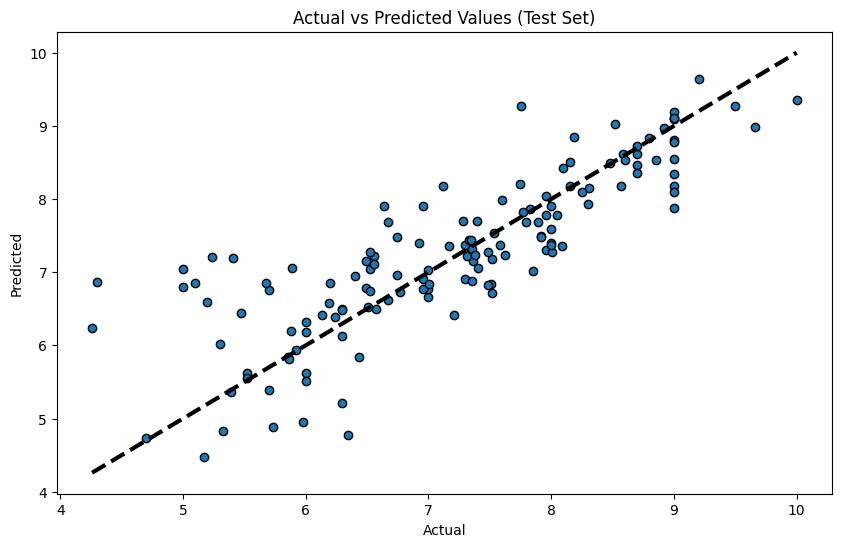

Training Set Metrics:
R-Squared: 0.8196933372336856
Adjusted R-Squared: 0.7920953786470049
Mean Squared Error (MSE): 0.31358062787454427
Mean Absolute Error (MAE): 0.42476342255329247
Mean Absolute Percentage Error (MAPE): 6.388054706225114

Testing Set Metrics:
R-Squared: 0.6873929292895071
Adjusted R-Squared: 0.33215762166394713
Mean Squared Error (MSE): 0.4745999644416296
Mean Absolute Error (MAE): 0.4854089796026026
Mean Absolute Percentage Error (MAPE): 7.592333321136283


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


X = merged_data


# Split the data
X_train, X_test, y_train, y_test = train_test_split(merged_data, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()

# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')


# **LASSO regression**

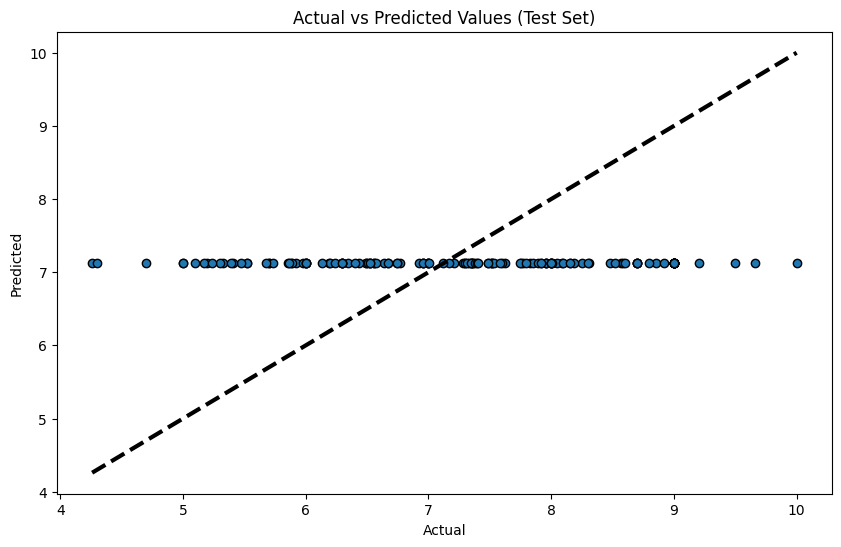

Training Set Metrics:
R-Squared: 0.0
Adjusted R-Squared: -0.15306122448979598
Mean Squared Error (MSE): 1.7391516379012526
Mean Absolute Error (MAE): 1.1010040095046596
Mean Absolute Percentage Error (MAPE): 16.820273997139623

Testing Set Metrics:
R-Squared: -0.002966942647611326
Adjusted R-Squared: -1.1427021047471695
Mean Squared Error (MSE): 1.5227041225741178
Mean Absolute Error (MAE): 1.031310890322935
Mean Absolute Percentage Error (MAPE): 15.106686928316751


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
X = merged_data
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from numpy import absolute
from numpy import mean
from numpy import std
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = Lasso(alpha  =1.0)
model.fit(X_train , y_train)
# Make predictions for both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Convert y_train and y_test to numpy arrays to avoid potential issues with pandas Series
y_train = np.array(y_train)
y_test = np.array(y_test)

# Calculate metrics for training set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Adjusted R-Squared for training set
n_train = X_train.shape[0]
p_train = X_train.shape[1]
train_adjusted_r2 = 1 - (1 - train_r2) * (n_train - 1) / (n_train - p_train - 1)

# Calculate metrics for testing set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Adjusted R-Squared for testing set
n_test = X_test.shape[0]
p_test = X_test.shape[1]
test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

# Plot predicted vs real values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Test Set)')
plt.show()


# Print metrics for training set
print("Training Set Metrics:")
print(f'R-Squared: {train_r2}')
print(f'Adjusted R-Squared: {train_adjusted_r2}')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

# Print metrics for testing set
print("\nTesting Set Metrics:")
print(f'R-Squared: {test_r2}')
print(f'Adjusted R-Squared: {test_adjusted_r2}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')